In [40]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.core.display import HTML
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb


In [41]:
network_definition = 'Physical activity{None|Little|Regular}->Obese{No|Moderate|Severe}<-Diet{Unhealthy|Normal|Healthy};' \
                     'Obese->Breast cancer{Yes|No}<-BRCA1-mutation{Yes|No}<-BRCA1-mother{Yes|No};' \
                     'BRCA1-father{Yes|No}->BRCA1-mutation; Menopause{Before|After}->Breast cancer'

network = gum.fastBN(network_definition)
# Priors
network.cpt("BRCA1-father").fillWith([0.0025,0.9975])
network.cpt("BRCA1-mother").fillWith([0.0025,0.9975])
network.cpt("Physical activity").fillWith([0.45,0.17,0.38])
network.cpt("Diet").fillWith([0.329,0.546,0.125])
network.cpt("Menopause").fillWith([0.6,0.4])

network.cpt("BRCA1-mutation")[{'BRCA1-mother': 'No' , 'BRCA1-father': 'No'}] = [0.01, 0.99]
network.cpt("BRCA1-mutation")[{'BRCA1-mother': 'Yes' , 'BRCA1-father': 'No'}] = [0.5, 0.5]
network.cpt("BRCA1-mutation")[{'BRCA1-mother': 'No' , 'BRCA1-father': 'Yes'}] = [0.5, 0.5]
network.cpt("BRCA1-mutation")[{'BRCA1-mother': 'Yes' , 'BRCA1-father': 'Yes'}] = [1, 0]

network.cpt("Obese")[{'Physical activity': 'None', 'Diet': 'Unhealthy'}] = [0.05,0.3,0.65]
network.cpt("Obese")[{'Physical activity': 'Little', 'Diet': 'Unhealthy'}] = [0.15,0.25,0.50]
network.cpt("Obese")[{'Physical activity': 'Regular', 'Diet': 'Unhealthy'}] = [0.4,0.35,0.25]
network.cpt("Obese")[{'Physical activity': 'None', 'Diet': 'Normal'}] = [0.5, 0.3, 0.2]
network.cpt("Obese")[{'Physical activity': 'Little', 'Diet': 'Normal'}] = [0.7, 0.2, 0.1]
network.cpt("Obese")[{'Physical activity': 'Regular', 'Diet': 'Normal'}] = [0.8,0.15,0.05]
network.cpt("Obese")[{'Physical activity': 'None', 'Diet': 'Healthy'}] = [0.7, 0.2, 0.1]
network.cpt("Obese")[{'Physical activity': 'Little', 'Diet': 'Healthy'}] = [0.8, 0.15, 0.05]
network.cpt("Obese")[{'Physical activity': 'Regular', 'Diet': 'Healthy'}] = [0.9, 0.09, 0.01]


network.cpt("Breast cancer")[{'Obese':'No', 'BRCA1-mutation': 'No', 'Menopause': 'After'}] = [0.22, 0.78]
network.cpt("Breast cancer")[{'Obese':'Moderate', 'BRCA1-mutation': 'No', 'Menopause': 'After'}] = [0.45, 0.55]
network.cpt("Breast cancer")[{'Obese':'Severe', 'BRCA1-mutation': 'No', 'Menopause': 'After'}] = [0.65, 0.35]
network.cpt("Breast cancer")[{'Obese':'No', 'BRCA1-mutation': 'Yes', 'Menopause': 'After'}] = [0.55, 0.45]
network.cpt("Breast cancer")[{'Obese':'Moderate', 'BRCA1-mutation': 'Yes', 'Menopause': 'After'}] = [0.82, 0.18]
network.cpt("Breast cancer")[{'Obese':'Severe', 'BRCA1-mutation': 'Yes', 'Menopause': 'After'}] = [0.92, 0.09]

network.cpt("Breast cancer")[{'Obese':'No', 'BRCA1-mutation': 'No', 'Menopause': 'Before'}] = [0.04, 0.96]
network.cpt("Breast cancer")[{'Obese':'Moderate', 'BRCA1-mutation': 'No', 'Menopause': 'Before'}] = [0.02, 0.98]
network.cpt("Breast cancer")[{'Obese':'Severe', 'BRCA1-mutation': 'No', 'Menopause': 'Before'}] = [0.01, 0.99]
network.cpt("Breast cancer")[{'Obese':'No', 'BRCA1-mutation': 'Yes', 'Menopause': 'Before'}] = [0.38, 0.62]
network.cpt("Breast cancer")[{'Obese':'Moderate', 'BRCA1-mutation': 'Yes', 'Menopause': 'Before'}] = [0.72, 0.28]
network.cpt("Breast cancer")[{'Obese':'Severe', 'BRCA1-mutation': 'Yes', 'Menopause': 'Before'}] = [0.83, 0.17]

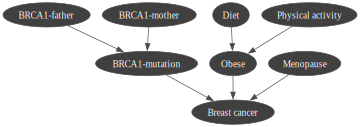

In [42]:
gnb.showBN(network)

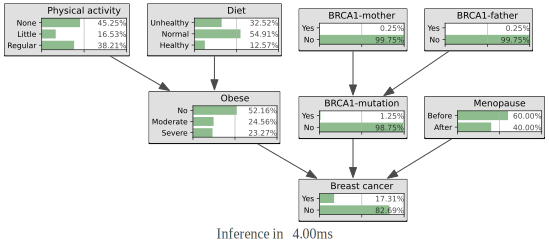

In [43]:
gnb.showInference(network, evs={})

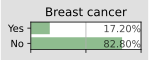

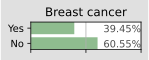

In [61]:
ie_denise = gum.LazyPropagation(network)
ie_denise.setEvidence({'BRCA1-father': 'No', 'BRCA1-mother': 'No'})
ie_denise.makeInference()
gnb.showProba(ie_denise.posterior("Breast cancer"))

ie_megan = gum.LazyPropagation(network)
ie_megan.setEvidence({'BRCA1-father': 'Yes', 'BRCA1-mother': 'No'})
ie_megan.makeInference()
gnb.showProba(ie_megan.posterior("Breast cancer"))

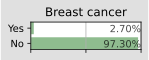

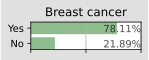

In [66]:
ie_denise.setEvidence({'BRCA1-father': 'No', 'BRCA1-mother': 'No', 'Obese': 'Moderate', 'Menopause': 'Before'})
ie_denise.makeInference()
gnb.showProba(ie_denise.posterior("Breast cancer"))

ie_megan.setEvidence({'BRCA1-father': 'Yes', 'BRCA1-mother': 'No', 'Obese': 'Severe', 'Menopause': 'After'})
ie_megan.makeInference()
gnb.showProba(ie_megan.posterior("Breast cancer"))

In [78]:
causal_megan = csl.CausalModel(network)

In [79]:
causal_megan = csl.CausalModel(network)

cslnb.showCausalImpact(causal_megan,
                        "Breast cancer",
                        doing={"Physical activity", "Diet"},
                        knowing={'BRCA1-father','BRCA1-mother','Menopause'},
                        values={'Physical activity':'Regular', 'Diet':'Healthy','BRCA1-father': 'Yes', 'BRCA1-mother': 'No', 'Menopause': 'After'})